# COVID-19 India - Understand Your Neighborhood 

### Importing libraries

In [24]:
#pip install --upgrade --force-reinstall requests

!conda install -c conda-forge beautifulsoup4 --yes
!conda install -c conda-forge folium=0.5.0 --yes
!conda install -c conda-forge geopy --yes
#!conda install --channel conda-forge geopandas

import json
import requests
import shutil
import seaborn as sns
import numpy as np 
import pandas as pd 
#import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans 
from sklearn import preprocessing
from scipy.spatial.distance import cdist

from pandas.io.json import json_normalize
from sklearn.cluster import KMeans

from bs4 import BeautifulSoup

import folium # map rendering library

from geopy.geocoders import Nominatim

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('Libraries imported.')

Libraries imported.


### Scraping website to get latest data on COVID-19 India

In [25]:
URL = 'https://www.grainmart.in/news/covid-19-coronavirus-india-state-and-district-wise-tally/'
page = requests.get(URL).text
soup = BeautifulSoup(page, 'html5lib')

In [26]:
## Extract states of India from website data

states_=[]
cat=['Cases','Active','Cured','Death']

states_soup = soup.find("div", attrs={"class": "site-content"})
stats = states_soup.find_all("span")
for x in range(0,len(stats),2):
    states_.append(stats[x].text.strip())

### States & UTs of India

In [27]:
print(states_)

['Maharashtra', 'Tamil Nadu', 'Gujarat', 'Delhi', 'Rajasthan', 'Madhya Pradesh', 'Uttar Pradesh', 'West Bengal', 'Andhra Pradesh', 'Punjab', 'Bihar', 'Telangana', 'Karnataka', 'Jammu and Kashmir', 'State Unassigned', 'Odisha', 'Haryana', 'Kerala', 'Jharkhand', 'Chandigarh', 'Assam', 'Tripura', 'Uttarakhand', 'Himachal Pradesh', 'Chhattisgarh', 'Goa', 'Ladakh', 'Andaman and Nicobar Islands', 'Manipur', 'Puducherry', 'Meghalaya', 'Mizoram', 'Arunachal Pradesh', 'Dadra and Nagar Haveli and Daman and Diu']


### Latest state-wise data for COVID-19 India

In [28]:
## State-wise information on COVID-19 India

gdp_table = soup.find_all("div", attrs={"class": "skgm-states"}) #class="entry-content"
dictt={}

for x in range(0,len(gdp_table)):
    check=[]
    for td in gdp_table[x].find_all("div"):
        check.append(td.text.strip())
    dictt[check[1]]={}
    dictt[check[1]]['Cases']=int(check[2])
    dictt[check[1]]['Active']=int(check[4])
    dictt[check[1]]['Cured']=int(check[3])
    dictt[check[1]]['Deaths']=int(check[5])
df_states=pd.DataFrame(dictt)
df_states=df_states.T.reset_index()
df_states.columns = ['States & Union Territories','Cases','Active','Cured','Deaths']
df_states=df_states.sort_values('States & Union Territories').reset_index(drop=True)
df_states.at[7,'States & Union Territories']='Dadra and Nagar Haveli'
df_states=df_states.sort_values('Cases',ascending=False).reset_index(drop=True)
df_states

,States & Union Territories,Cases,Active,Cured,Deaths
0,Maharashtra,41642,28462,11726,1454
1,Tamil Nadu,13967,7590,6282,95
2,Gujarat,12910,6649,5488,773
3,Delhi,11659,5898,5567,194
4,Rajasthan,6227,2591,3485,151
5,Madhya Pradesh,5981,2866,2844,271
6,Uttar Pradesh,5515,2173,3204,138
7,West Bengal,3197,1745,1193,259
8,Andhra Pradesh,2605,846,1705,54
9,Punjab,2028,170,1819,39


### Day-wise data of India for COVID-19

In [29]:
## Download csv file from a wbsite

def callme():
    url = "https://prsindia.org/covid-19/cases/download"
    r = requests.get(url, verify=False,stream=True)
    if r.status_code!=200:
        print("Failure!!")
        exit()
    else:
        r.raw.decode_content = True
        with open("COVID_Data.csv", 'wb') as f:
            shutil.copyfileobj(r.raw, f)
        print("Success")

if __name__ == '__main__':
    callme()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/urllib3/connectionpool.py:986: InsecureRequestWarning: Unverified HTTPS request is being made to host 'prsindia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


Success


In [30]:
COVID_Data=pd.read_csv('COVID_Data.csv')
COVID_Data.drop('S. No.',axis=1,inplace=True)
COVID_India = COVID_Data[COVID_Data['Region']=='India']
print('Rise in cases from past 10 days')
COVID_India.tail(10)

Rise in cases from past 10 days


,Date,Region,Confirmed Cases,Active Cases,Cured/Discharged,Death
62,13/05/2020,India,74281,47480,24386.0,2415.0
63,14/05/2020,India,78003,49219,26235.0,2549.0
64,15/05/2020,India,81970,51401,27920.0,2649.0
65,16/05/2020,India,85940,53035,30153.0,2752.0
66,17/05/2020,India,90927,53946,34109.0,2872.0
67,18/05/2020,India,96169,56316,36824.0,3029.0
68,19/05/2020,India,101139,58802,39174.0,3163.0
69,20/05/2020,India,106750,61149,42298.0,3303.0
70,21/05/2020,India,112359,63624,45300.0,3435.0
71,22/05/2020,India,118447,66330,48534.0,3583.0


#### Line plot to show rise in cases since March

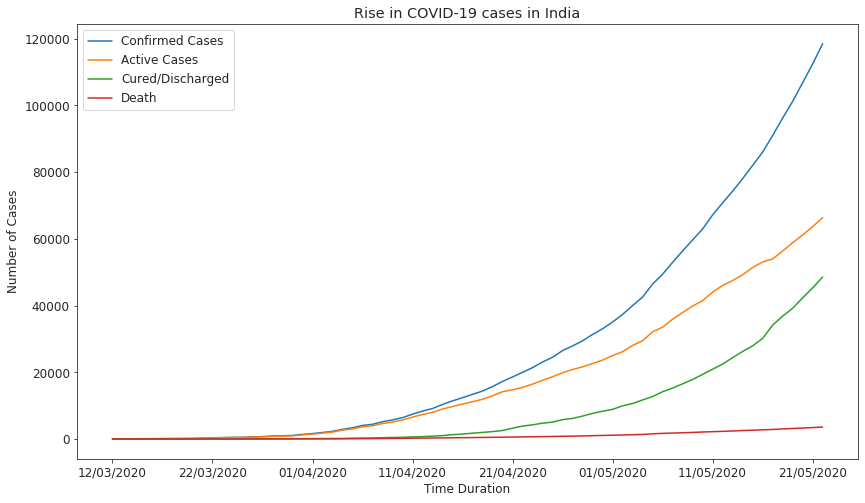

In [31]:
graphs=COVID_India
graphs=graphs.set_index('Date')
graphs.drop('Region',1,inplace=True)
graphs.plot(kind='line',figsize=(14,8))
plt.title('Rise in COVID-19 cases in India')
plt.xlabel('Time Duration')
plt.ylabel('Number of Cases')
plt.show()

#### Bar Graph

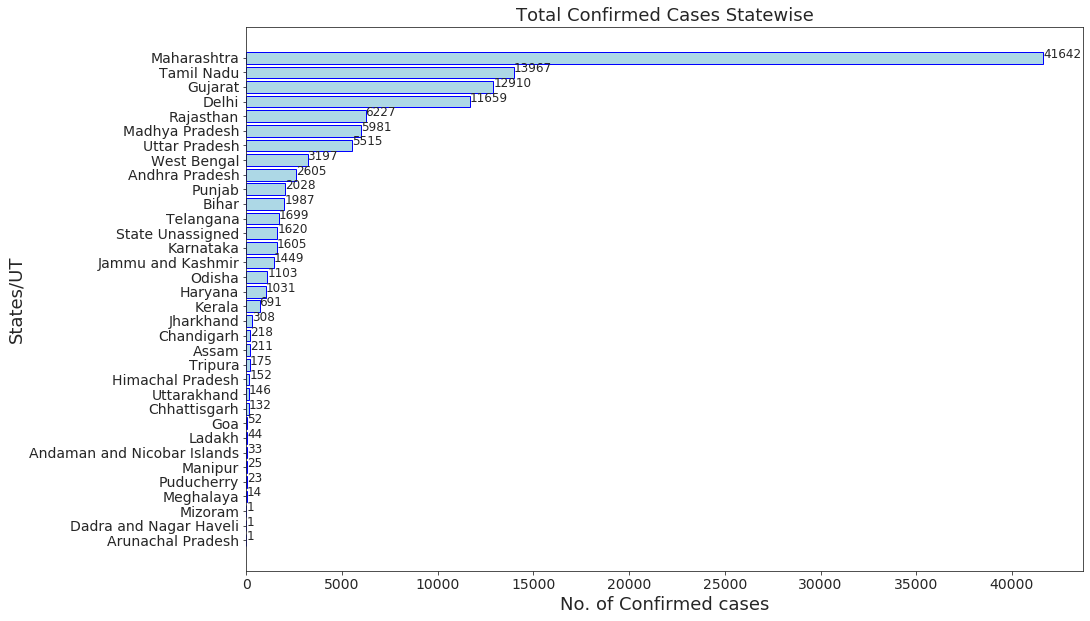

In [32]:
##MAPS + GRAPHS + CHARTS

sns.set_style('ticks')
plt.figure(figsize = (15,10))
plt.barh(df_states['States & Union Territories'],df_states['Cases'].map(int),align = 'center', color = 'lightblue', edgecolor = 'blue')
plt.xlabel('No. of Confirmed cases', fontsize = 18)
plt.ylabel('States/UT', fontsize = 18)
plt.gca().invert_yaxis()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Total Confirmed Cases Statewise', fontsize = 18 )
for index, value in enumerate(df_states['Cases']):
    plt.text(value, index, str(value), fontsize = 12)
plt.show()

#### Pie Chart

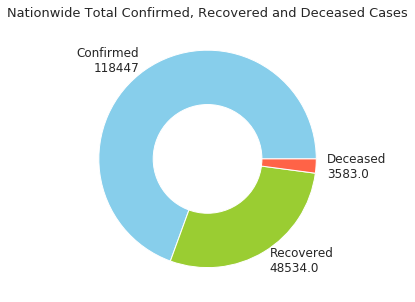

In [33]:
total=COVID_India.tail(1)
group_size = [sum(total['Confirmed Cases']),
              sum(total['Cured/Discharged']),
              sum(total['Death'])]
group_labels = ['Confirmed\n' + str(sum(total['Confirmed Cases'])),
                'Recovered\n' + str(sum(total['Cured/Discharged'])),
                'Deceased\n' + str(sum(total['Death']))]
custom_colors = ['skyblue','yellowgreen','tomato']
plt.figure(figsize = (5,5))
plt.pie(group_size, labels = group_labels, colors = custom_colors)
central_circle = plt.Circle((0,0), 0.5, color = 'white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size = 12)
plt.title('Nationwide Total Confirmed, Recovered and Deceased Cases', fontsize = 13)
plt.show()

### Latitude and Longitude for each state

In [34]:
## Get latitude and Longitude for each district

Latitude=[]
Longitude=[]

## Getting latitudes and longitudes of state

for x in df_states['States & Union Territories']:
    
    if x=='State Unassigned':
        address='India, India'
    else: 
        address=x+', India'
    
    geolocator = Nominatim(user_agent="ny_explorer")
    location= geolocator.geocode(address)
    try:
        Latitude.append(location.latitude)
    except:
        Latitude.append(np.nan)
    try:
        Longitude.append(location.longitude)
    except:
        Longitude.append(np.nan)

df_states['Latitude']=Latitude
df_states['Longitude']=Longitude
India=df_states
India

,States & Union Territories,Cases,Active,Cured,Deaths,Latitude,Longitude
0,Maharashtra,41642,28462,11726,1454,19.531932,76.055457
1,Tamil Nadu,13967,7590,6282,95,10.909433,78.366535
2,Gujarat,12910,6649,5488,773,22.415408,72.031497
3,Delhi,11659,5898,5567,194,28.651718,77.221939
4,Rajasthan,6227,2591,3485,151,26.810578,73.768455
5,Madhya Pradesh,5981,2866,2844,271,23.969928,79.394870
6,Uttar Pradesh,5515,2173,3204,138,27.130334,80.859666
7,West Bengal,3197,1745,1193,259,22.996495,87.685588
8,Andhra Pradesh,2605,846,1705,54,15.924091,80.186381
9,Punjab,2028,170,1819,39,30.929321,75.500484


### Map to show states of India

In [35]:
## Map of India showing states and their current Active cases

lat=20.5937 
long=78.9629
India_Map = folium.Map(location=[lat, long], zoom_start=5,max_zoom=5,min_zoom=5,no_touch=True)

for lat, lng, label1 in zip(India['Latitude'], India['Longitude'], India['States & Union Territories']):
    label = folium.Popup(str(label1), parse_html=True)
    folium.Marker(
        [lat, lng],
        popup=label
    ).add_to(India_Map)  

India_Map

### Map to show state-wise cases for COVID-19 in India (size of circle dipicts the high count of cases)

In [36]:
df_states['Latitude']=Latitude
df_states['Longitude']=Longitude
India=df_states

## Map of India showing states and their current Active cases

lat=20.5937 
long=78.9629
India_Map = folium.Map(location=[lat, long], zoom_start=5,max_zoom=5,min_zoom=5,no_touch=True)

for lat, lng, label1,label2,label3 in zip(India['Latitude'], India['Longitude'], India['States & Union Territories'],India['Cases'],India['Active']):
    label = folium.Popup(str(label1)+'- Cases:'+str(label2)+' Active:'+str(label3), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=int(label2)/700,
        popup=label,
        color='#3186cc',
        fill=True,
        fill_color='greenyellow',
        fill_opacity=0.7,
        parse_html=False).add_to(India_Map)  
    
India_Map

### India census data 2011

In [37]:
df=pd.read_csv('Modified.csv')
df.head()

,State name,District name,Population,Male,Female,Literate,Workers,Non_Workers,Households_with_Internet,Rural_Households,Urban_Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated,Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car,Households_with_Television,Households_with_Telephone_Mobile_Phone,Household_size_1_person_Households,Household_size_2_persons_Households,Household_size_1_to_2_persons,Household_size_3_persons_Households,Household_size_3_to_5_persons_Households,Household_size_4_persons_Households,Household_size_5_persons_Households,Household_size_6_8_persons_Households,Household_size_9_persons_and_above_Households
0,Maharashtra,Ahmednagar,4543159,2342825,2200334,3151890,2204590,2338569,18370,1041393,282011,2496560,1166245,865139,15215,37444,474009,639160,33434,82081,115515,96430,495176,217812,180934,226142,64915
1,Maharashtra,Akola,1813906,932334,881572,1411281,768154,1045752,6163,308158,196077,998769,483200,327932,4005,11896,176674,195210,13577,40804,54381,52202,234221,97428,84591,86078,16455
2,Maharashtra,Amravati,2888445,1480768,1407677,2251875,1236322,1652123,9438,508921,272894,1540590,783549,553265,11041,18992,302188,295756,23825,68468,92293,90409,398987,172071,136507,124902,21264
3,Maharashtra,Aurangabad,3701282,1924469,1776813,2503837,1575079,2126203,23258,551789,427343,2211996,909771,571932,7583,43514,403594,526483,22399,63485,85884,88118,415993,174101,153774,186833,47877
4,Maharashtra,Bhandara,1200334,605520,594814,899860,597305,603029,2932,283843,72575,626978,333120,232754,7482,5536,117299,131424,11857,27093,38950,38939,180328,79510,61879,50895,5600


### Combined data for COVID-19 and Census-2011

In [38]:
col=['State name']+list(df.columns[2:])
India_Info=df[col].groupby('State name').sum().reset_index()
df_states=df_states.sort_values('States & Union Territories').reset_index(drop=True)
India_Info=India_Info.sort_values('State name').reset_index(drop=True)
India_Info[['Latitude','Longitude','Cases','Active','Cured','Deaths']]=df_states[['Latitude','Longitude','Cases','Active','Cured','Deaths']]
cols=['State name','Population','Latitude','Longitude','Cases','Active','Cured','Deaths']+list(India_Info.columns[2:26])
India_Info=India_Info[cols]
India_Info=India_Info.sort_values('Cases',ascending=False).reset_index(drop=True)
India_Info.head()

,State name,Population,Latitude,Longitude,Cases,Active,Cured,Deaths,Male,Female,Literate,Workers,Non_Workers,Households_with_Internet,Rural_Households,Urban_Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated,Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car,Households_with_Television,Households_with_Telephone_Mobile_Phone,Household_size_1_person_Households,Household_size_2_persons_Households,Household_size_1_to_2_persons,Household_size_3_persons_Households,Household_size_3_to_5_persons_Households,Household_size_4_persons_Households,Household_size_5_persons_Households,Household_size_6_8_persons_Households,Household_size_9_persons_and_above_Households
0,Maharashtra,112374333,19.531932,76.055457,41642,28462,11726,1454,58243056,54131277,81554290,49427878,62946455,1379351,17519193,16050569,61782561,30272010,19912066,407696,1726271,13525610,16458761,979618,2418863,3398481,3352445,14104899,6022935,4729519,5141922,1185278
1,Telangana,26384661,10.909433,78.366535,13967,7590,6282,95,13243789,13140872,15181177,12551267,13833394,199769,4985249,2485041,14685109,6959913,4407759,331880,293502,3543805,4392157,255848,770494,1026342,1006256,4044776,1816552,1221968,1045170,152107
2,Gujarat,60439692,22.415408,72.031497,12910,6649,5488,773,31491260,28948432,41093358,24767747,35671945,381622,9293240,8230790,34370917,16291242,9538689,238844,766063,6550293,8399799,444680,1116240,1560920,1475520,6579836,2694940,2409376,3283141,757821
3,Delhi,16787941,28.651718,77.221939,11659,5898,5567,194,8987326,7800615,12737767,5587049,11200892,588951,124422,4481133,9665080,4762353,2343806,16702,766847,2939423,3031775,123106,252370,375476,428403,1912610,803065,681142,853773,198679
4,Rajasthan,68548437,26.810578,73.768455,6227,2591,3485,151,35550997,32997440,38275282,29886255,38662182,226501,13296654,4774309,42814434,15938006,9526395,269602,447438,4727542,8882714,348434,969031,1317465,1206109,5924187,2267493,2450585,4122643,1217008


In [39]:
try:
    df_states.drop(df_states[df_states['States & Union Territories'] == 'State Unassigned'].index.tolist(), axis=0,inplace=True)
    df_states=df_states.reset_index(drop=True)
    India.drop(India[India['States & Union Territories'] == 'State Unassigned'].index.tolist(), axis=0,inplace=True)
    India=India.reset_index(drop=True)
    states_.remove('State Unassigned')
except:
    pass

### Cluster each state on the basis of COVID data

In [40]:
cluster=India.drop(['States & Union Territories','Latitude','Longitude'],1)

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 

K = range(1,11) 
  
for k in K: 
    kmeanModel = KMeans(n_clusters=k).fit(cluster)     
    distortions.append(sum(np.min(cdist(cluster, kmeanModel.cluster_centers_,'euclidean'),axis=1)) / cluster.shape[0]) 
    inertias.append(kmeanModel.inertia_) 

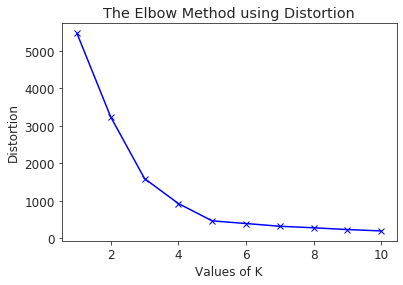

In [41]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

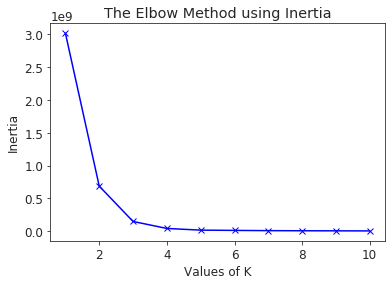

In [42]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [43]:
kmeanModel = KMeans(n_clusters=4).fit(cluster) 
India.insert(1, 'Cluster Labels', kmeanModel.labels_)

#### STATES Cluster 1 - COVID-19 India

In [44]:
India.loc[India['Cluster Labels'] == 0]

,States & Union Territories,Cluster Labels,Cases,Active,Cured,Deaths,Latitude,Longitude
8,Andhra Pradesh,0,2605,846,1705,54,15.924091,80.186381
9,Punjab,0,2028,170,1819,39,30.929321,75.500484
10,Bihar,0,1987,1407,571,9,25.644085,85.906508
11,Telangana,0,1699,618,1036,45,17.849592,79.115166
12,Karnataka,0,1605,992,571,41,14.520390,75.722352
13,Jammu and Kashmir,0,1449,745,684,20,33.531554,75.310964
14,Odisha,0,1103,703,393,7,20.543124,84.689732
15,Haryana,0,1031,336,681,14,29.000000,76.000000
16,Kerala,0,691,177,510,4,10.352874,76.512040
17,Jharkhand,0,308,169,136,3,23.455981,85.255730


#### STATES Cluster 2 - COVID-19 India

In [45]:
India.loc[India['Cluster Labels'] == 1]

,States & Union Territories,Cluster Labels,Cases,Active,Cured,Deaths,Latitude,Longitude
0,Maharashtra,1,41642,28462,11726,1454,19.531932,76.055457


#### STATES Cluster 3 - COVID-19 India

In [46]:
India.loc[India['Cluster Labels'] == 2]

,States & Union Territories,Cluster Labels,Cases,Active,Cured,Deaths,Latitude,Longitude
1,Tamil Nadu,2,13967,7590,6282,95,10.909433,78.366535
2,Gujarat,2,12910,6649,5488,773,22.415408,72.031497
3,Delhi,2,11659,5898,5567,194,28.651718,77.221939


#### STATES Cluster 4 - COVID-19 India

In [47]:
India.loc[India['Cluster Labels'] == 3]

,States & Union Territories,Cluster Labels,Cases,Active,Cured,Deaths,Latitude,Longitude
4,Rajasthan,3,6227,2591,3485,151,26.810578,73.768455
5,Madhya Pradesh,3,5981,2866,2844,271,23.969928,79.394870
6,Uttar Pradesh,3,5515,2173,3204,138,27.130334,80.859666
7,West Bengal,3,3197,1745,1193,259,22.996495,87.685588


### Map to show clusters of states of India on the basis to COVID-19

In [48]:
latitude=20.5937
longitude=78.9629

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)
colors_array = ['yellow','red','blue','green']

# add markers to the map
for lat, lon, poi, cluster in zip(India['Latitude'], India['Longitude'], India['States & Union Territories'], India['Cluster Labels']):
    label = folium.Popup(str(poi) + ', Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors_array[cluster-1],
        fill=True,
        fill_color=colors_array[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Cluster each state on the basis of census data

In [49]:
cluster=India_Info.drop(['State name','Latitude','Longitude','Cases','Active','Cured','Deaths'],1)

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 

K = range(1,11) 
  
for k in K: 
    kmeanModel = KMeans(n_clusters=k).fit(cluster)     
    distortions.append(sum(np.min(cdist(cluster, kmeanModel.cluster_centers_,'euclidean'),axis=1)) / cluster.shape[0]) 
    inertias.append(kmeanModel.inertia_) 

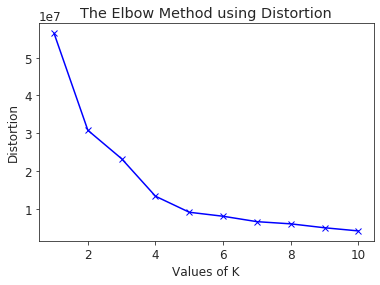

In [50]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

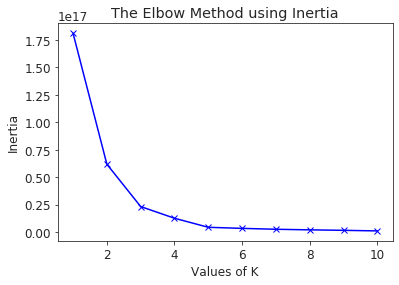

In [51]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [52]:
kmeanModel = KMeans(n_clusters=4).fit(cluster) 
India_Info.insert(1, 'Cluster Labels', kmeanModel.labels_)

#### STATES Cluster 1 - Census-2011 India

In [53]:
India_Info.loc[India['Cluster Labels'] == 0]

,State name,Cluster Labels,Population,Latitude,Longitude,Cases,Active,Cured,Deaths,Male,Female,Literate,Workers,Non_Workers,Households_with_Internet,Rural_Households,Urban_Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated,Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car,Households_with_Television,Households_with_Telephone_Mobile_Phone,Household_size_1_person_Households,Household_size_2_persons_Households,Household_size_1_to_2_persons,Household_size_3_persons_Households,Household_size_3_to_5_persons_Households,Household_size_4_persons_Households,Household_size_5_persons_Households,Household_size_6_8_persons_Households,Household_size_9_persons_and_above_Households
8,Punjab,3,27743338,30.929321,75.500484,2028,170,1819,39,14639465,13103873,18707137,9897362,17845976,292111,4668757,3178690,15143130,7481850,5076836,41522,543122,4468245,4442740,138345,340721,479066,621998,3118445,1281505,1214942,1477658,334530
9,Bihar,1,104099452,25.644085,85.906508,1987,1407,571,9,54278157,49821295,52504553,34724987,69374465,165521,20713342,2701332,66930323,22949064,13816563,403502,180385,2751541,10510770,405633,1787002,2192635,1996724,8323623,2939167,3387732,6376382,2047989
10,Tripura,0,3673917,17.849592,79.115166,1699,618,1036,45,1874376,1799541,2804783,1469521,2204396,8612,748686,318177,2093146,1010551,568604,1616,12784,377988,405115,26452,76052,102504,180731,575624,238465,156428,149806,14847
11,Tamil Nadu,1,72147030,22.351115,78.667743,1620,1620,0,0,36137975,36009055,51837507,32884681,39262349,772257,11937264,11229457,36336584,21429281,14314360,66805,1174257,16080190,13850821,976688,2571680,3548368,3511561,12471990,5689448,3270981,2266231,206414
12,Karnataka,1,61095297,14.520390,75.722352,1605,992,571,41,30966657,30128640,40647322,27872597,33222700,638468,10620687,7378379,33676315,16740325,10632806,45851,917186,7911490,9433399,524064,1270899,1794963,2028811,7971962,3451438,2491713,2728081,684905
13,Jammu and Kashmir,0,12407815,33.531554,75.310964,1449,745,684,20,6561691,5846124,6973463,4247634,8160181,57403,2626540,922698,7654504,3028208,1710234,14869,75585,1014558,1386371,31259,110592,141851,196486,966342,366001,403855,682246,203872
14,Odisha,3,41974218,20.543124,84.689732,1103,703,393,7,21212136,20762082,26742595,17541589,24432629,135393,10554975,2204158,23359384,11179683,7315980,119171,203125,2581277,3846884,403387,1149808,1553195,1627180,5773968,2298346,1848442,2020043,313879
15,Haryana,3,25351462,29.000000,76.000000,1031,336,681,14,13494734,11856728,16598988,8916508,16434954,248076,4444365,2643643,15006789,6403218,3909921,31534,418399,3203191,3743361,106587,290328,396915,497375,2622769,1095789,1029605,1341181,357089
16,Kerala,3,33406061,10.352874,76.512040,691,177,510,4,16027412,17378649,28135824,11619063,21786998,483609,5857785,5360068,15711427,9796202,7863946,34486,665427,5929498,6919494,284408,814585,1098993,1338510,5085338,2314368,1432460,1248749,283290
17,Jharkhand,3,31923078,23.455981,85.255730,308,169,136,3,16385904,15537174,17715076,12668223,19254855,88468,5529280,1981066,19941672,7500768,4366551,114087,171545,1597044,2877655,158486,478642,637128,666041,2912453,1082693,1163719,1915364,498668


#### STATES Cluster 2 - Census-2011 India

In [54]:
India_Info.loc[India['Cluster Labels'] == 1]

,State name,Cluster Labels,Population,Latitude,Longitude,Cases,Active,Cured,Deaths,Male,Female,Literate,Workers,Non_Workers,Households_with_Internet,Rural_Households,Urban_Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated,Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car,Households_with_Television,Households_with_Telephone_Mobile_Phone,Household_size_1_person_Households,Household_size_2_persons_Households,Household_size_1_to_2_persons,Household_size_3_persons_Households,Household_size_3_to_5_persons_Households,Household_size_4_persons_Households,Household_size_5_persons_Households,Household_size_6_8_persons_Households,Household_size_9_persons_and_above_Households
0,Maharashtra,1,112374333,19.531932,76.055457,41642,28462,11726,1454,58243056,54131277,81554290,49427878,62946455,1379351,17519193,16050569,61782561,30272010,19912066,407696,1726271,13525610,16458761,979618,2418863,3398481,3352445,14104899,6022935,4729519,5141922,1185278


#### STATES Cluster 3 - Census-2011 India

In [55]:
India_Info.loc[India['Cluster Labels'] == 2]

,State name,Cluster Labels,Population,Latitude,Longitude,Cases,Active,Cured,Deaths,Male,Female,Literate,Workers,Non_Workers,Households_with_Internet,Rural_Households,Urban_Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated,Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car,Households_with_Television,Households_with_Telephone_Mobile_Phone,Household_size_1_person_Households,Household_size_2_persons_Households,Household_size_1_to_2_persons,Household_size_3_persons_Households,Household_size_3_to_5_persons_Households,Household_size_4_persons_Households,Household_size_5_persons_Households,Household_size_6_8_persons_Households,Household_size_9_persons_and_above_Households
1,Telangana,3,26384661,10.909433,78.366535,13967,7590,6282,95,13243789,13140872,15181177,12551267,13833394,199769,4985249,2485041,14685109,6959913,4407759,331880,293502,3543805,4392157,255848,770494,1026342,1006256,4044776,1816552,1221968,1045170,152107
2,Gujarat,1,60439692,22.415408,72.031497,12910,6649,5488,773,31491260,28948432,41093358,24767747,35671945,381622,9293240,8230790,34370917,16291242,9538689,238844,766063,6550293,8399799,444680,1116240,1560920,1475520,6579836,2694940,2409376,3283141,757821
3,Delhi,0,16787941,28.651718,77.221939,11659,5898,5567,194,8987326,7800615,12737767,5587049,11200892,588951,124422,4481133,9665080,4762353,2343806,16702,766847,2939423,3031775,123106,252370,375476,428403,1912610,803065,681142,853773,198679


#### STATES Cluster 4 - Census-2011 India

In [56]:
India_Info.loc[India['Cluster Labels'] == 3]

,State name,Cluster Labels,Population,Latitude,Longitude,Cases,Active,Cured,Deaths,Male,Female,Literate,Workers,Non_Workers,Households_with_Internet,Rural_Households,Urban_Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated,Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car,Households_with_Television,Households_with_Telephone_Mobile_Phone,Household_size_1_person_Households,Household_size_2_persons_Households,Household_size_1_to_2_persons,Household_size_3_persons_Households,Household_size_3_to_5_persons_Households,Household_size_4_persons_Households,Household_size_5_persons_Households,Household_size_6_8_persons_Households,Household_size_9_persons_and_above_Households
4,Rajasthan,1,68548437,26.810578,73.768455,6227,2591,3485,151,35550997,32997440,38275282,29886255,38662182,226501,13296654,4774309,42814434,15938006,9526395,269602,447438,4727542,8882714,348434,969031,1317465,1206109,5924187,2267493,2450585,4122643,1217008
5,Madhya Pradesh,1,72626809,23.969928,79.394870,5981,2866,2844,271,37612306,35014503,42851169,31574133,41052676,212473,13453987,5044776,44264116,17814066,10465765,82862,426457,4811219,6886675,644626,1623067,2267693,1780638,7810693,3018882,3011173,4096655,792556
6,Uttarakhand,0,10086292,27.130334,80.859666,5515,2173,3204,138,5137773,4948519,6880953,3872275,6214017,63032,2512569,870841,6033370,2419886,1616428,16608,125209,1237708,1489596,110599,165411,276010,234913,1028660,402226,391521,565398,127000
7,Andhra Pradesh,1,58196116,15.924091,80.186381,2605,846,1705,54,29198357,28997759,35375583,26871639,31324477,349515,12188828,5935878,31130560,16188539,10437466,439551,523490,8814288,8870160,791038,2105487,2896525,2618290,9842040,4684360,2539390,1817599,199975


### Map to show clusters of states of India on the basis to Census-2011 data

In [57]:
latitude=20.5937
longitude=78.9629

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)
colors_array = ['yellow','red','blue','green']

# add markers to the map
for lat, lon, poi, cluster in zip(India_Info['Latitude'], India_Info['Longitude'], India_Info['State name'], India_Info['Cluster Labels']):
    label = folium.Popup(str(poi) + ', Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors_array[cluster-1],
        fill=True,
        fill_color=colors_array[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### States and their assignment value

In [58]:
StatesIndia={}
for x in range(0,len(states_)):
    StatesIndia[states_[x]]=x
pd.DataFrame([StatesIndia]).style.hide_index()

Maharashtra,Tamil Nadu,Gujarat,Delhi,Rajasthan,Madhya Pradesh,Uttar Pradesh,West Bengal,Andhra Pradesh,Punjab,Bihar,Telangana,Karnataka,Jammu and Kashmir,Odisha,Haryana,Kerala,Jharkhand,Chandigarh,Assam,Tripura,Uttarakhand,Himachal Pradesh,Chhattisgarh,Goa,Ladakh,Andaman and Nicobar Islands,Manipur,Puducherry,Meghalaya,Mizoram,Arunachal Pradesh,Dadra and Nagar Haveli and Daman and Diu
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32


### Please enter the state number you would like to explore

In [59]:
while(True):
    check=int(input("Please enter the state assignment number you are interested in. *Refer the above assigment row* : "))
    if check in range (0,34):
        for s, n in StatesIndia.items():
            if n == check:
                print(f'State mentioned is : {s}')
                break;
        break;

Please enter the state assignment number you are interested in. *Refer the above assigment row* :  1


State mentioned is : Tamil Nadu


### Scrape website to get district-wise COVID-19 data for mentioned state

In [60]:
## Class to create district-wise DataFrames

class states_info:
    
    def __init__(self,states,gdp_table):
        self.states=states
        self.gdp_table=gdp_table
    
    def calc(self):
        DICT={}
        for x in range(0,len(self.states)):
            #print(self.states[x])
            self.states[x]={}
            list1=[]

            for td in self.gdp_table[x].find_all('div', attrs={"class": "skgm-td"}):
                list1.append(td.text.strip())

            for y in range(10,len(list1)):
                if y%5==0:
                    self.states[x][list1[y]]={}
                    count=0
                    sub=y
                if y%5!=0:
                    self.states[x][list1[sub]][cat[count]]=int(list1[y])
                    count+=1
            self.states[x]=pd.DataFrame(self.states[x])

In [61]:
states=[]
gdp_table = soup.find_all("div", attrs={"class": "skgm-states"})
for x in range(0,len(stats),2):
    states.append(stats[x].text.strip())
data = states_info(states,gdp_table)
data.calc()

### District-wise COVID-19 cases for selected state

In [62]:
states[check]=states[check].T.reset_index()
states[check].columns=['Districts','Cases','Active','Cured','Death']
District=states[check]
District

,Districts,Cases,Active,Cured,Death
0,Chennai,8801,3048,5685,68
1,Chengalpattu,651,233,415,3
2,Thiruvallur,636,215,414,7
3,Cuddalore,421,401,19,1
4,Ariyalur,355,348,7,0
5,Viluppuram,323,294,27,2
6,Tirunelveli,254,88,165,1
7,Kancheepuram,233,129,103,1
8,Madurai,191,109,80,2
9,Tiruvannamalai,170,62,108,0


In [63]:
cluster=District.drop('Districts',1)

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 

kmeanModel = KMeans(n_clusters=3).fit(cluster) 
District.insert(1, 'Cluster Labels', kmeanModel.labels_)

In [64]:
## Get latitude and Longitude for each district

Latitude=[]
Longitude=[]

## Getting latitudes and longitudes of state

for x in District['Districts']:
    
    if x=='Unknown' or x=='Other State' or x=='Other Region':
        address=s+', '+s+', India'
    else: 
        address=x+', '+s+', India'
    
    geolocator = Nominatim(user_agent="ny_explorer")
    location= geolocator.geocode(address)
    try:
        Latitude.append(location.latitude)
    except:
        Latitude.append(np.nan)
    try:
        Longitude.append(location.longitude)
    except:
        Longitude.append(np.nan)
    #try:
        #print('The geograpical coordinate of {} are {}, {}.'.format(address, location.latitude, location.longitude))
    #except:
        #print('The geograpical coordinate of {} are {}, {}.'.format(address, np.nan, np.nan))

District['Latitude']=Latitude
District['Longitude']=Longitude

In [65]:
x = District['Cases'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.reshape(-1, 1))
unk = pd.DataFrame(x_scaled)
unk.columns=['Cases']

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### Map showing district level cases of COVID-19 for selected state

In [66]:
## Map of state showing district level cases

if s == 'Delhi':
    mul=10000
else: mul = 200

if s == 'Delhi':
    siz=11
else:siz=7
    
lat=float(India[India['States & Union Territories']==s]['Latitude'])
lng=float(India[India['States & Union Territories']==s]['Longitude'])
colorl=['yellow','red','blue']
State_Map = folium.Map(location=[lat, lng], zoom_start=siz,max_zoom=11,min_zoom=6,no_touch=True)

for lat, lng, label1,label2,label3 in zip(District['Latitude'], District['Longitude'], District['Districts'],unk['Cases'],District['Cluster Labels']):
    if (s == 'Delhi' and label1=='Unknown'):
        rad=float(label2)*100
        col='black'
    else:
        rad=float(label2)*mul
        col=colorl[label3]
        
    label = folium.Popup(str(label1), parse_html=True)
    try:
        folium.CircleMarker(
            [lat, lng],
            radius=rad,
            popup=label,
            color='#3186cc',
            fill=True,
            fill_color=col,
            fill_opacity=0.7,
            parse_html=False).add_to(State_Map)  
    except:
        pass
    
State_Map

### Cluster state districts on the basis of census data

In [67]:
District_Census=df[df['State name']==s].reset_index(drop=True)
District_Census

,State name,District name,Population,Male,Female,Literate,Workers,Non_Workers,Households_with_Internet,Rural_Households,Urban_Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated,Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car,Households_with_Television,Households_with_Telephone_Mobile_Phone,Household_size_1_person_Households,Household_size_2_persons_Households,Household_size_1_to_2_persons,Household_size_3_persons_Households,Household_size_3_to_5_persons_Households,Household_size_4_persons_Households,Household_size_5_persons_Households,Household_size_6_8_persons_Households,Household_size_9_persons_and_above_Households
0,Tamil Nadu,Ariyalur,754894,374703,380191,480604,359851,395043,1749,223955,30322,380484,216103,157771,536,3046,165150,134358,12986,30209,43195,35012,125800,52855,37933,27758,1353
1,Tamil Nadu,Chennai,4646732,2335844,2310888,3776276,1817297,2829435,217368,0,1314125,2271657,1468902,899279,6894,264763,1055696,1017122,30582,139139,169721,237897,798018,377533,182588,122912,15916
2,Tamil Nadu,Coimbatore,3458045,1729297,1728748,2635907,1567950,1890095,63273,284795,884957,1579517,1117221,757738,3569,109489,841918,777347,46603,155662,202265,230417,668312,314321,123574,69356,6010
3,Tamil Nadu,Cuddalore,2605914,1311697,1294217,1815281,1169880,1436034,15396,497429,260780,1364411,764669,473617,3217,27077,555029,470021,25226,75857,101083,107152,431186,192059,131975,97658,7495
4,Tamil Nadu,Dharmapuri,1506843,774303,732540,917709,751170,755673,3651,396819,91107,804186,434328,267536,793,7687,310765,258752,18542,49127,67669,61578,252941,114633,76730,56310,4004
5,Tamil Nadu,Dindigul,2159775,1080938,1078837,1481834,1105155,1054620,9155,443818,269724,1065734,647806,443528,2707,15800,458486,379839,30279,83532,113811,107295,375642,172444,95903,68502,5217
6,Tamil Nadu,Erode,2251744,1129868,1121876,1492662,1195773,1055971,18604,411286,432398,1006543,701326,542295,1580,37339,557479,483430,55751,124130,179881,152415,434027,203567,78045,42331,2495
7,Tamil Nadu,Kancheepuram,3998252,2012958,1985294,3013382,1673814,2324438,100322,438799,774705,2076492,1200284,715895,5581,137686,904619,832716,37098,128984,166082,196143,701330,325921,179266,115195,11202
8,Tamil Nadu,Kanyakumari,1870374,926345,944029,1548738,679620,1190754,15673,104253,493788,887052,556548,425849,925,23194,438938,398548,22630,54799,77429,85208,348564,172003,91353,57448,5760
9,Tamil Nadu,Karur,1064493,528184,536309,727044,543298,521195,4915,212241,152420,501585,320645,241843,420,10393,250010,210748,21751,45727,67478,57883,185113,82916,44314,32276,2981


In [68]:
cluster=District_Census.drop(['State name','District name'],1)
kmeanModel = KMeans(n_clusters=3).fit(cluster) 
District_Census.insert(2, 'Cluster Labels', kmeanModel.labels_)

In [69]:
## Get latitude and Longitude for each district

Latitude=[]
Longitude=[]

## Getting latitudes and longitudes of state

for x in District_Census['District name']:
    
    if x=='Unknown' or x=='Other State' or x=='Other Region':
        address=s+', '+s+', India'
    else: 
        address=x+', '+s+', India'
    
    geolocator = Nominatim(user_agent="ny_explorer")
    location= geolocator.geocode(address)
    try:
        Latitude.append(location.latitude)
    except:
        Latitude.append(np.nan)
    try:
        Longitude.append(location.longitude)
    except:
        Longitude.append(np.nan)
    #try:
        #print('The geograpical coordinate of {} are {}, {}.'.format(address, location.latitude, location.longitude))
    #except:
        #print('The geograpical coordinate of {} are {}, {}.'.format(address, np.nan, np.nan))

District_Census['Latitude']=Latitude
District_Census['Longitude']=Longitude

In [70]:
## Map of state showing district level cases

if s == 'Delhi':
    mul=10000
else: mul = 200

if s == 'Delhi':
    siz=11
else:siz=7
    
lat=float(India[India['States & Union Territories']==s]['Latitude'])
lng=float(India[India['States & Union Territories']==s]['Longitude'])
colorl=['yellow','red','blue','green']
State_Map = folium.Map(location=[lat, lng], zoom_start=siz,max_zoom=11,min_zoom=6,no_touch=True)

for lat, lng, label1,label2 in zip(District_Census['Latitude'], District_Census['Longitude'], District_Census['District name'],District_Census['Cluster Labels']):
    if (s == 'Delhi' and label1=='Unknown'):
        rad=float(label2)*100
        col='black'
    else:
        rad=15
        col=colorl[label2]
        
    label = folium.Popup(str(label1), parse_html=True)
    try:
        folium.CircleMarker(
            [lat, lng],
            radius=rad,
            popup=label,
            color='#3186cc',
            fill=True,
            fill_color=col,
            fill_opacity=0.7,
            parse_html=False).add_to(State_Map)  
    except:
        pass
    
State_Map

### Neighborhood of each district for selected state

In [71]:
CLIENT_ID = 'TAM0AZCRXZJVGTBEB5TREJNKTEMYWKXHQX5NWIG4WS0O1LOW' # your Foursquare ID
CLIENT_SECRET = 'K4UTSYZSKXJKC5VIQVU1NNMQI5JFN451LH0I23IFYJOZE44E' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 40

In [72]:
## function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [73]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    global results
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        except:
            pass

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Districts', 
                  'Districts Latitude', 
                  'Districts Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [74]:
District_Venues = getNearbyVenues(names=District['Districts'],
                                   latitudes=District['Latitude'],
                                   longitudes=District['Longitude']
                                  )

In [75]:
catdf=pd.get_dummies(District_Venues[['Venue Category']], prefix="", prefix_sep="")
cols=['Districts']+list(catdf.columns)
catdf['Districts']=District_Venues['Districts']
catdf=catdf[cols]
catdf=catdf.groupby('Districts').mean().reset_index()
catdf.head()

,Districts,ATM,Airport,Airport Lounge,Airport Terminal,Arcade,Asian Restaurant,BBQ Joint,Bakery,Bar,Beach,Bed & Breakfast,Boat or Ferry,Bookstore,Breakfast Spot,Burger Joint,Bus Station,Business Service,Café,Campground,Candy Store,Church,City,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Cricket Ground,Cupcake Shop,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Fast Food Restaurant,Flea Market,Food Court,Forest,Garden,Grocery Store,Historic Site,Hotel,Hotel Bar,Hyderabadi Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Market,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mountain,Multicuisine Indian Restaurant,Multiplex,Museum,Nightclub,Optical Shop,Park,Pharmacy,Pizza Place,Platform,Pub,Resort,Restaurant,Road,Sake Bar,Sandwich Place,Scenic Lookout,Sculpture Garden,Shopping Mall,Snack Place,Soccer Stadium,South Indian Restaurant,Sports Club,Steakhouse,Train,Train Station,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store
0,Airport Quarantine,0.0,0.03125,0.09375,0.09375,0.0,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.031250,0.03125,0.0,0.00,0.03125,0.125000,0.000000,0.0,0.0,0.0,0.000,0.0,0.03125,0.0,0.000000,0.0,0.0,0.000,0.000,0.03125,0.000,0.0625,0.000000,0.000,0.0,0.0,0.03125,0.0,0.062500,0.0,0.0,0.000,0.062500,0.0,0.0,0.03125,0.000000,0.0,0.000000,0.0,0.031250,0.0,0.03125,0.03125,0.000000,0.000000,0.0,0.00,0.0,0.031250,0.000000,0.03125,0.0,0.000000,0.03125,0.0,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.03125,0.000000,0.000,0.0,0.031250,0.000000,0.000000,0.0
1,Chengalpattu,0.0,0.00000,0.00000,0.00000,0.0,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.00,0.00000,0.166667,0.000000,0.0,0.0,0.0,0.000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000,0.000,0.00000,0.000,0.0000,0.000000,0.000,0.0,0.0,0.00000,0.0,0.166667,0.0,0.0,0.000,0.166667,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.000000,0.000000,0.0,0.00,0.0,0.166667,0.166667,0.00000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.00000,0.000000,0.000,0.0,0.166667,0.000000,0.000000,0.0
2,Chennai,0.0,0.00000,0.00000,0.00000,0.0,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.068966,0.00000,0.0,0.00,0.00000,0.000000,0.034483,0.0,0.0,0.0,0.000,0.0,0.00000,0.0,0.034483,0.0,0.0,0.000,0.000,0.00000,0.000,0.0000,0.034483,0.000,0.0,0.0,0.00000,0.0,0.034483,0.0,0.0,0.000,0.275862,0.0,0.0,0.00000,0.068966,0.0,0.034483,0.0,0.034483,0.0,0.00000,0.00000,0.034483,0.034483,0.0,0.00,0.0,0.000000,0.034483,0.00000,0.0,0.034483,0.00000,0.0,0.034483,0.0,0.0,0.00,0.034483,0.034483,0.00000,0.034483,0.000,0.0,0.034483,0.034483,0.034483,0.0
3,Coimbatore,0.0,0.00000,0.00000,0.00000,0.0,0.05,0.025,0.025,0.025,0.0,0.0,0.0,0.000000,0.00000,0.0,0.00,0.00000,0.025000,0.000000,0.0,0.0,0.0,0.075,0.0,0.00000,0.0,0.000000,0.0,0.0,0.075,0.025,0.00000,0.025,0.0250,0.000000,0.025,0.0,0.0,0.00000,0.0,0.050000,0.0,0.0,0.075,0.175000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.05000,0.000000,0.000000,0.0,0.05,0.0,0.025000,0.000000,0.00000,0.0,0.025000,0.00000,0.0,0.025000,0.0,0.0,0.05,0.000000,0.000000,0.00000,0.000000,0.025,0.0,0.000000,0.050000,0.000000,0.0
4,Cuddalore,0.0,0.00000,0.00000,0.00000,0.0,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.25,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000,0.000,0.00000,0.000,0.0000,0.000000,0.000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000,0.250000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.00000,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.00,0.000000,0.000000,0.00000,0.000000,0.000,0.0,0.000000,0.500000,0.000000,0.0


### Listed below are the most common places within each district according to their category

In [76]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [77]:
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Districts']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
districts_venues_sorted = pd.DataFrame(columns=columns)
districts_venues_sorted['Districts'] = catdf['Districts']

for ind in np.arange(catdf.shape[0]):
    districts_venues_sorted.iloc[ind, 1:] = return_most_common_venues(catdf.iloc[ind, :], num_top_venues)

districts_venues_sorted

,Districts,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,Airport Quarantine,Café,Airport Lounge,Airport Terminal,Indian Restaurant,Hotel,Fast Food Restaurant,Pub,Grocery Store,Donut Shop,Airport,Juice Bar,Comfort Food Restaurant,Metro Station,Multicuisine Indian Restaurant,Multiplex,Business Service,Pizza Place,Train Station,Breakfast Spot,Bookstore
1,Chengalpattu,Hotel,Platform,Indian Restaurant,Pizza Place,Café,Train Station,Airport Terminal,Dessert Shop,Coffee Shop,Comfort Food Restaurant,Concert Hall,Cricket Ground,Cupcake Shop,Department Store,Diner,City,Donut Shop,Electronics Store,Airport,Fast Food Restaurant
2,Chennai,Indian Restaurant,Market,Bookstore,Hotel,Restaurant,Flea Market,Cricket Ground,Video Store,Memorial Site,Campground,Metro Station,Museum,Platform,Nightclub,Sandwich Place,Vegetarian / Vegan Restaurant,Soccer Stadium,Snack Place,Train Station,Sports Club
3,Coimbatore,Indian Restaurant,Clothing Store,Ice Cream Shop,Dessert Shop,Asian Restaurant,Multiplex,Park,Shopping Mall,Hotel,Vegetarian / Vegan Restaurant,BBQ Joint,Café,Bakery,Bar,Sandwich Place,Restaurant,Steakhouse,Electronics Store,Diner,Pizza Place
4,Cuddalore,Vegetarian / Vegan Restaurant,Indian Restaurant,Bus Station,Warehouse Store,Dessert Shop,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Cricket Ground,Cupcake Shop,Department Store,Diner,Church,Donut Shop,Electronics Store,Fast Food Restaurant,Flea Market,Food Court,Forest
5,Erode,ATM,Church,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Cricket Ground,Cupcake Shop,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Fast Food Restaurant,Flea Market,Food Court,Forest,Garden,Grocery Store,City
6,Kancheepuram,Indian Restaurant,Café,Fast Food Restaurant,Warehouse Store,Department Store,Clothing Store,Coffee Shop,Comfort Food Restaurant,Concert Hall,Cricket Ground,Cupcake Shop,Diner,Dessert Shop,Church,Donut Shop,Electronics Store,Flea Market,Food Court,Forest,Garden
7,Kanyakumari,Hotel,Beach,Historic Site,Resort,Arcade,Asian Restaurant,Sculpture Garden,Indian Restaurant,Boat or Ferry,Airport Lounge,Concert Hall,Cricket Ground,Cupcake Shop,Department Store,Dessert Shop,Diner,Fast Food Restaurant,Donut Shop,Electronics Store,Coffee Shop
8,Karur,ATM,Clothing Store,Concert Hall,Church,Coffee Shop,Comfort Food Restaurant,Cricket Ground,Cupcake Shop,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Fast Food Restaurant,Flea Market,Food Court,Forest,Garden,Grocery Store,City
9,Krishnagiri,Indian Restaurant,Bus Station,Men's Store,Warehouse Store,Dessert Shop,Coffee Shop,Comfort Food Restaurant,Concert Hall,Cricket Ground,Cupcake Shop,Department Store,Diner,City,Donut Shop,Electronics Store,Fast Food Restaurant,Flea Market,Food Court,Forest,Garden


### Below is the list of popular places in the selected state

In [78]:
District_Venues

,Districts,Districts Latitude,Districts Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Chennai,13.080172,80.283833,Fort Museum,13.080618,80.287719,Museum
1,Chennai,13.080172,80.283833,National Durbar Hotel,13.081301,80.270601,Indian Restaurant
2,Chennai,13.080172,80.283833,M A Chidambaram Stadium,13.062830,80.279239,Cricket Ground
3,Chennai,13.080172,80.283833,Seena bhai tiffen centre,13.089670,80.278455,Restaurant
4,Chennai,13.080172,80.283833,Kakada Ramprasad,13.090415,80.279111,Indian Restaurant
5,Chennai,13.080172,80.283833,Pasha,13.080774,80.272894,Nightclub
6,Chennai,13.080172,80.283833,French Loaf,13.083779,80.275255,Sandwich Place
7,Chennai,13.080172,80.283833,Burma Bazaar,13.088904,80.289918,Video Store
8,Chennai,13.080172,80.283833,Hotel Buhari,13.081526,80.274286,Indian Restaurant
9,Chennai,13.080172,80.283833,Nair Mess,13.064455,80.277560,Indian Restaurant


# Thank You